In [139]:
# Nama   : Mia Amaliah 
# NIM    : 1202922002
# Tugas : SVM

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/passenger-list-for-the-estonia-ferry-disaster/estonia-passenger-list.csv


In [140]:
data = pd.read_csv ('../input/passenger-list-for-the-estonia-ferry-disaster/estonia-passenger-list.csv')
data

,PassengerId,Country,Firstname,Lastname,Sex,Age,Category,Survived
0,1,Sweden,ARVID KALLE,AADLI,M,62,P,0
1,2,Estonia,LEA,AALISTE,F,22,C,0
2,3,Estonia,AIRI,AAVASTE,F,21,C,0
3,4,Sweden,JURI,AAVIK,M,53,C,0
4,5,Sweden,BRITTA ELISABET,AHLSTROM,F,55,P,0
...,...,...,...,...,...,...,...,...
984,985,Sweden,ANNA INGRID BIRGITTA,OSTROM,F,60,P,0
985,986,Sweden,ELMAR MIKAEL,OUN,M,34,P,1
986,987,Sweden,ENN,QUNAPUU,M,77,P,0
987,988,Sweden,LY,GUNAPUU,F,87,P,0


In [141]:
data=data.drop(['Country','Firstname','Lastname'],axis=1)
data

,PassengerId,Sex,Age,Category,Survived
0,1,M,62,P,0
1,2,F,22,C,0
2,3,F,21,C,0
3,4,M,53,C,0
4,5,F,55,P,0
...,...,...,...,...,...
984,985,F,60,P,0
985,986,M,34,P,1
986,987,M,77,P,0
987,988,F,87,P,0


In [142]:
data.isna().sum()

PassengerId    0
Sex            0
Age            0
Category       0
Survived       0
dtype: int64

In [143]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 989 entries, 0 to 988
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  989 non-null    int64 
 1   Sex          989 non-null    object
 2   Age          989 non-null    int64 
 3   Category     989 non-null    object
 4   Survived     989 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 38.8+ KB


In [144]:
def binary_encode(df, column, postive_value):
    df = df.copy()
    df[column] = df[column].apply(lambda x: 1 if x == postive_value else 0)
    return df
    


In [145]:
data = binary_encode(data, 'Sex', 'M')
data = binary_encode(data, 'Category', 'P')
data


,PassengerId,Sex,Age,Category,Survived
0,1,1,62,1,0
1,2,0,22,0,0
2,3,0,21,0,0
3,4,1,53,0,0
4,5,0,55,1,0
...,...,...,...,...,...
984,985,0,60,1,0
985,986,1,34,1,1
986,987,1,77,1,0
987,988,0,87,1,0


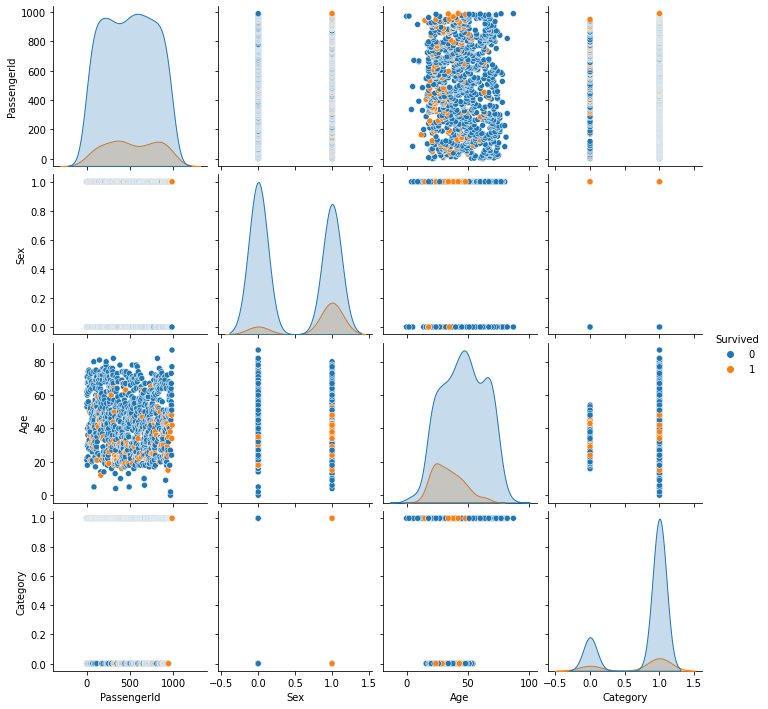

In [146]:
sns.pairplot(data=data, hue = 'Survived', kind='scatter')

<AxesSubplot:>

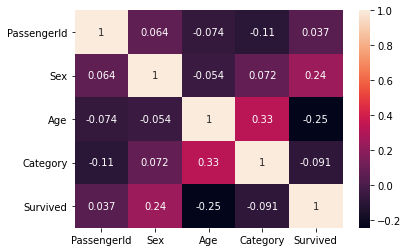

In [147]:
sns.heatmap(data[['PassengerId','Sex', 'Age','Category','Survived']].corr(), annot=True)

In [148]:
x=data.drop(['Survived'],axis=1).values
y=data['Survived'].values
print (x)
print (y)

[[  1   1  62   1]
 [  2   0  22   0]
 [  3   0  21   0]
 ...
 [987   1  77   1]
 [988   0  87   1]
 [989   1  42   1]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 1 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0
 1 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0
 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 

In [149]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)
x_train.shape, x_test.shape

((692, 4), (297, 4))

In [150]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform (x_test)


In [151]:
svc = SVC(C=100, random_state=1, kernel='rbf')
svc.fit(x_train, y_train)

SVC(C=100, random_state=1)

In [152]:
y_predict = svc.predict(x_test)
print (y_predict)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0]


In [153]:
cm = confusion_matrix(y_test, y_predict)
ac = accuracy_score (y_test,y_predict)
cr = classification_report (y_test,y_predict)

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


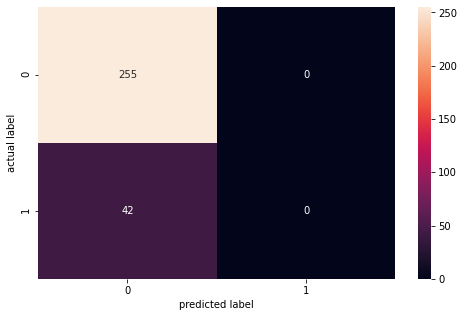

0.8585858585858586
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       255
           1       0.00      0.00      0.00        42

    accuracy                           0.86       297
   macro avg       0.43      0.50      0.46       297
weighted avg       0.74      0.86      0.79       297



In [154]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_predict), annot=True, fmt=".0f", ax=ax)
plt.xlabel("predicted label")
plt.ylabel("actual label")
plt.show()

print (ac)
print (cr)